# Linear Regression Using TensorFlow
**Sibt ul Hussain**

In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow as tf

In [6]:
#Generate Training Data...
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [9]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [12]:
W=tf.Variable(1.0,name="Weight")
b=tf.Variable(1.0,name="Bias")

In [14]:
h=tf.add(tf.mul(W,X),b)

In [22]:
#loss=tf.reduce_mean(tf.square(h-Y))
loss=tf.reduce_sum(tf.pow(h-Y, 2))/(2*n_samples)

In [23]:
init=tf.initialize_all_variables()
optimizer=tf.train.GradientDescentOptimizer(0.01).minimize(loss)

Epoch: 0001 cost= 5.381464481 W= 0.718389 b= 0.959751


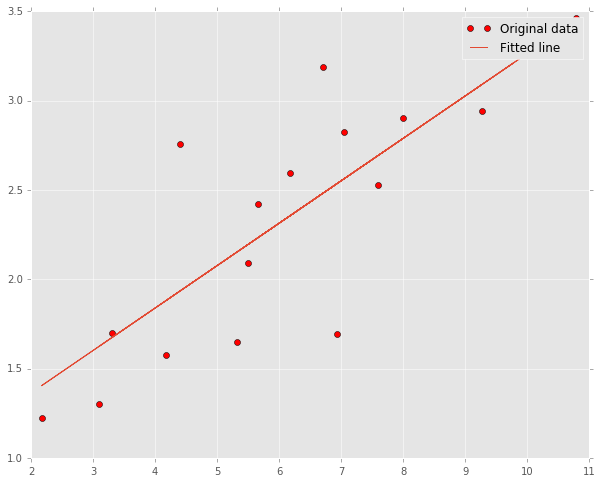

In [28]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(20):
        for x,y in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if epoch % 100==0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(loss, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(h,feed_dict={X:train_X}), label='Fitted line')
    plt.legend()
    plt.show()        